In [1]:
# MO444-A 2s/2017 - First assignment
#
#         Group 05
#
# - Anderson Rossanez (124136)
# - Bruno Branta Lopes (31470)
#

# Plotting inline instead of opening an outer window.
%matplotlib inline

# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import sqrt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Defines
years = range(1922, 2011)

# Functions
def load_data(filename):
    raw_data = open(filename, 'rt')
    data = np.loadtxt(raw_data, delimiter=",")
    return data

def split_Y_X(dataset):
    Y = dataset[:,0]
    X = dataset[:,1:]
    return Y, X

def get_errors_by_year(model, data_Y, data_X):
    errors = []
    for y in years:
        filt = data_Y == y
        if not sum(filt):
            errors.append(0)
            continue
        errors.append(mean_squared_error(data_Y[filt], model.predict(data_X[filt])))
    return errors

In [2]:
# load training data
data = load_data('year-prediction-msd-train.txt')

print('Training data size: {}'.format(len(data)))

Training data size: 463715


In [3]:
# Take a look at the data (5 first instances):
# - first column (index 0) is the song release year
# - remaining columns are the the features (indexes 1 - 90)
data_frame = pd.DataFrame(data)
data_frame.head(5)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2004,46.50128,-18.37096,58.89824,27.28181,1.93097,-2.43167,18.64843,-5.62769,-1.47711,...,43.94716,-64.21148,13.04284,156.03785,-2.42670,51.71977,-43.56703,10.63735,24.08962,-21.41886
1,2005,41.46015,-52.30140,-4.59825,-19.28084,-11.85844,-19.54192,1.30306,-1.83185,5.98469,...,-13.48435,-154.65715,35.22429,89.53649,-3.13145,-128.28120,89.97277,-15.88139,-75.21074,-0.51139
2,2009,42.18667,-85.65863,-7.91506,-11.84193,-12.61959,-21.66749,4.97883,-11.86750,9.87342,...,42.08584,-181.77349,43.00181,87.94977,-13.70362,136.49979,140.32633,11.51422,382.79589,29.98269
3,1987,46.90244,19.86314,10.92119,4.87136,-41.17499,-19.84156,2.93308,-5.98711,3.05997,...,-2.76407,-20.31782,-75.24506,125.81801,-15.50828,-63.31002,-142.21937,-12.36699,32.45911,-17.14909
4,2009,46.64388,-81.99503,41.62851,3.65855,-9.38201,-13.51749,7.48781,-7.03302,7.06982,...,12.29244,-143.25348,91.15842,-227.85481,7.75916,-41.32376,-225.66526,-4.05081,455.39458,41.65310


In [4]:
# split train data into training/validation (80/20)
train_data, validation_data = train_test_split(data, test_size=0.2)

print('Train data size: {}'.format(len(train_data)))
print('Validation data size: {}'.format(len(validation_data)))

Train data size: 370972
Validation data size: 92743


In [5]:
# load test data
test_data = load_data('year-prediction-msd-test.txt')

print('Test data size: {}'.format(len(test_data)))

Test data size: 36285


In [6]:
# Split label (years) and features
train_data_Y, train_data_X = split_Y_X(train_data)
validation_data_Y, validation_data_X = split_Y_X(validation_data)
test_data_Y, test_data_X = split_Y_X(test_data)

In [7]:
# Create a baseline linear regression model and train it
lr_base_model = LinearRegression(copy_X=True)
lr_base_model.fit(train_data_X, train_data_Y)

print('Number of coefficients: {}'.format(len(lr_base_model.coef_)))
print('Coefficients: {}'.format(lr_base_model.coef_))

Number of coefficients: 90
Coefficients: [  8.75733788e-01  -5.59339070e-02  -4.33953024e-02   1.52650613e-03
  -1.48181588e-02  -2.21285348e-01  -6.74764052e-03  -1.01284054e-01
  -6.83031952e-02   2.51074777e-02  -1.60704462e-01  -3.69473456e-03
   4.74916461e-02   3.54603643e-04  -4.16760559e-04   6.31867329e-04
   4.21687908e-04   1.50971851e-03   1.98965058e-03   2.21320217e-03
   7.35735887e-04  -4.25563838e-04   7.37249439e-03   2.77007847e-03
  -3.58120942e-03   2.25840224e-05   1.56419541e-03   4.59754863e-04
   9.68521285e-04  -2.91135280e-04  -1.23649627e-03  -1.78713591e-03
  -5.59929808e-03   2.14194283e-03   1.28210869e-03  -5.37205258e-03
  -2.23974154e-04   6.48882271e-04   1.39421359e-03  -1.78986188e-03
  -2.05762353e-03  -8.20191818e-04  -1.65571089e-03  -2.73358954e-03
  -3.27989043e-03   6.62353860e-03   5.04818781e-04  -2.03842100e-03
   3.88135812e-04   2.14353076e-03   5.49425520e-05  -1.78164799e-03
   2.13070608e-03   2.37636252e-04  -2.38901683e-04   8.257657

In [8]:
# A quick comparison on some instances of the validation data with the predicted values...
print('Actual: {}'.format(validation_data_Y[0:5]))
print('Predicted: {}'.format(lr_base_model.predict(validation_data_X)[0:5]))

Actual: [ 2006.  1984.  1990.  1999.  2009.]
Predicted: [ 1998.94373883  1995.13512057  1992.32110723  2006.85220433  2003.16145996]


In [9]:
# ... and the errors
mean_sq_error_training = mean_squared_error(train_data_Y, lr_base_model.predict(train_data_X))
print('Training mean squared error: {}'.format(mean_sq_error_training))
print('Training root mean squared error: {}'.format(sqrt(mean_sq_error_training)))

mean_sq_error_validation = mean_squared_error(validation_data_Y, lr_base_model.predict(validation_data_X))
print('Validation mean squared error: {}'.format(mean_sq_error_validation))

print('Validation root mean squared error: {}'.format(sqrt(mean_sq_error_validation)))

Training mean squared error: 91.2854582434
Training root mean squared error: 9.55434237629
Validation mean squared error: 91.1748058329
Validation root mean squared error: 9.54854993352


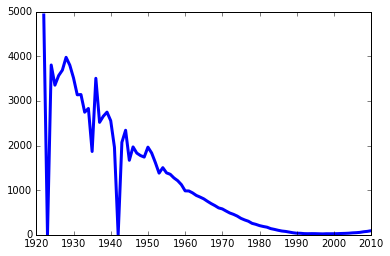

In [10]:
# plotting the errors
errors = get_errors_by_year(lr_base_model, validation_data_Y, validation_data_X)
plt.plot(years, errors, color='blue', linewidth=3)
plt.show()

In [11]:
# LR-based alternative #1: LR with Stochastic Gradient Descent
lr_sgd_model = SGDRegressor()

lr_sgd_model.fit(train_data_X, train_data_Y )

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=5, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [12]:
# Check the model errors
mean_sq_error_training = mean_squared_error(train_data_Y, lr_sgd_model.predict(train_data_X))
print('Training mean squared error: {}'.format(mean_sq_error_training))
print('Training root mean squared error: {}'.format(sqrt(mean_sq_error_training)))

mean_sq_error_validation = mean_squared_error(validation_data_Y, lr_sgd_model.predict(validation_data_X))
print('Validation mean squared error: {}'.format(mean_sq_error_validation))
print('Validation root mean squared error: {}'.format(sqrt(mean_sq_error_validation)))

Training mean squared error: 5.6273626215e+30
Training root mean squared error: 2.37220627718e+15
Validation mean squared error: 5.59974391201e+30
Validation root mean squared error: 2.36637780416e+15


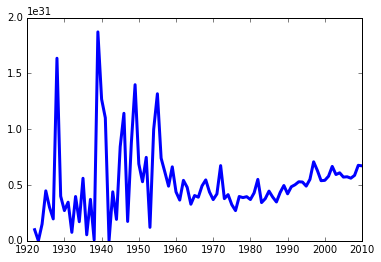

In [13]:
# Plotting the errors:
errors = get_errors_by_year(lr_sgd_model, validation_data_Y, validation_data_X)
plt.plot(years, errors, color='blue', linewidth=3)
plt.show()

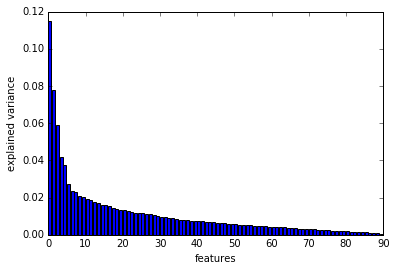

[ 0.11516461  0.07781111  0.05914848  0.04197715  0.0375692   0.02757096
  0.02359598  0.02309808  0.02105611  0.0202444   0.01924048  0.01862303
  0.01786878  0.01690936  0.01624851  0.01583882  0.0152439   0.01420903
  0.01401714  0.01346559  0.01310228  0.01258209  0.01237201  0.0118062
  0.01153863  0.01147714  0.01108108  0.01093658  0.01042752  0.01008212
  0.00979576  0.00942841  0.00928947  0.00893223  0.00840872  0.00818169
  0.00806265  0.00799727  0.00763781  0.00750455  0.00732487  0.00720045
  0.00697542  0.00681977  0.00663107  0.00637808  0.00628398  0.00614063
  0.00596697  0.00579067  0.0056783   0.00549876  0.00535415  0.00516995
  0.00502817  0.00499974  0.0048758   0.00471792  0.00460654  0.00439421
  0.00423651  0.00411011  0.00397953  0.00393329  0.00371423  0.00363887
  0.00351179  0.00335848  0.00325413  0.00316946  0.00303335  0.00293031
  0.00275274  0.00273796  0.00261976  0.0024715   0.00229041  0.00214483
  0.00207638  0.00204326  0.00188021  0.00175344  0.

In [14]:
# LR-based alternative #2: Feature reduction

# Standardize the data
std_train_data_X = preprocessing.scale(train_data_X)

# Principal component analysis (PCA)
pca = PCA(n_components=90).fit(std_train_data_X)
plt.bar(range(0, 90), pca.explained_variance_ratio_)
plt.xlabel('features')
plt.ylabel('explained variance')
plt.show()
print(pca.explained_variance_ratio_)

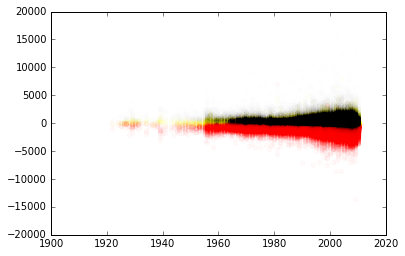

In [15]:
# First three PCA components plotted
transformed_data = pca.transform(validation_data_X)
plt.scatter(validation_data_Y, transformed_data[:,3], color='yellow', alpha=0.02)
plt.scatter(validation_data_Y, transformed_data[:,2], color='red', alpha=0.02)
plt.scatter(validation_data_Y, transformed_data[:,1], color='black', alpha=0.005)
plt.show()

In [16]:
for n_components in range(0, 91, 10):
    n_components = n_components or 1
    transformed_train_data_X = pca.transform(train_data_X)[:,range(0, n_components)]

    lr_pca_model = LinearRegression(copy_X=True)
    lr_pca_model.fit(transformed_train_data_X, train_data_Y)

    mean_sq_error_training = mean_squared_error(train_data_Y, lr_pca_model.predict(transformed_train_data_X))
    
    transformed_validation_data_X = pca.transform(validation_data_X)[:,range(0, n_components)]
    mean_sq_error_validation = mean_squared_error(validation_data_Y, lr_pca_model.predict(transformed_validation_data_X))

    print '%2d PCA components used: %5.2f %5.2f' % (n_components, sqrt(mean_sq_error_training), sqrt(mean_sq_error_validation))


 1 PCA components used: 10.95 10.90
10 PCA components used: 10.67 10.62
20 PCA components used: 10.59 10.55
30 PCA components used: 10.46 10.42
40 PCA components used: 10.41 10.37
50 PCA components used: 10.30 10.27
60 PCA components used: 10.24 10.22
70 PCA components used: 10.21 10.18
80 PCA components used:  9.99  9.97
90 PCA components used:  9.55  9.55


In [17]:
# performs ridge regression for 1 to 4 degrees
n_components = 7
for degree in range(1, 5):
    transformed_train_data_X = pca.transform(train_data_X)[:,range(0, n_components)]
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    # model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(transformed_train_data_X, train_data_Y)
    
    mean_sq_error_training = mean_squared_error(train_data_Y, model.predict(transformed_train_data_X))
    
    transformed_validation_data_X = pca.transform(validation_data_X)[:,range(0, n_components)]
    mean_sq_error_validation = mean_squared_error(validation_data_Y, model.predict(transformed_validation_data_X))

    print '%d degrees: %5.2f %5.2f' % (degree, sqrt(mean_sq_error_training), sqrt(mean_sq_error_validation))

1 degrees: 10.69 10.64
2 degrees: 10.61 10.58
3 degrees: 10.55 10.60
4 degrees: 10.51 12.54
